# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Jonathan Kollmann

Datum: 19.11.2023

Gruppe: 49

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Verhält sich ein abkühlendes Getränk nach dem Newtonschen Abkühlungsgesetz?

## Versuchsaufbau und Durchführung

Bei einer Tasse, gefüllt mit 250 ml Kaffee, wird über einen Zeitraum von zehn Minuten mit einem Temperatursensor die Abkühlung der Flüssigkeit gemessen. Mit einem zweiten Sensor wird währenddessen die Raumtemperatur detektiert.


<img src="figures/newton.jpeg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")

### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
import h5py as h5
with h5.File("/home/pi/calorimetry_home/data/newton/newton.h5") as f:
    
    sensor_1 = f["RawData/1ee7f265-383a-6731-8b98-2126e6711b85"]
    sensor_1_name = f["RawData/1ee7f265-383a-6731-8b98-2126e6711b85"].attrs["name"]
    sensor_1_serial = f["RawData/1ee7f265-383a-6731-8b98-2126e6711b85"].attrs["serial"]
    sensor_2 = f["RawData/1ee7f266-937f-6479-b639-73dc121f7d8a"]
    sensor_2_name = f["RawData/1ee7f266-937f-6479-b639-73dc121f7d8a"].attrs["name"]
    sensor_2_serial = f["RawData/1ee7f266-937f-6479-b639-73dc121f7d8a"].attrs["serial"]

    temp_sensor_1 = list(sensor_1["temperature"])
    time_sensor_1 = list(sensor_1["timestamp"])
    temp_sensor_2 = list(sensor_2["temperature"])
    time_sensor_2 = list(sensor_2["timestamp"])
# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


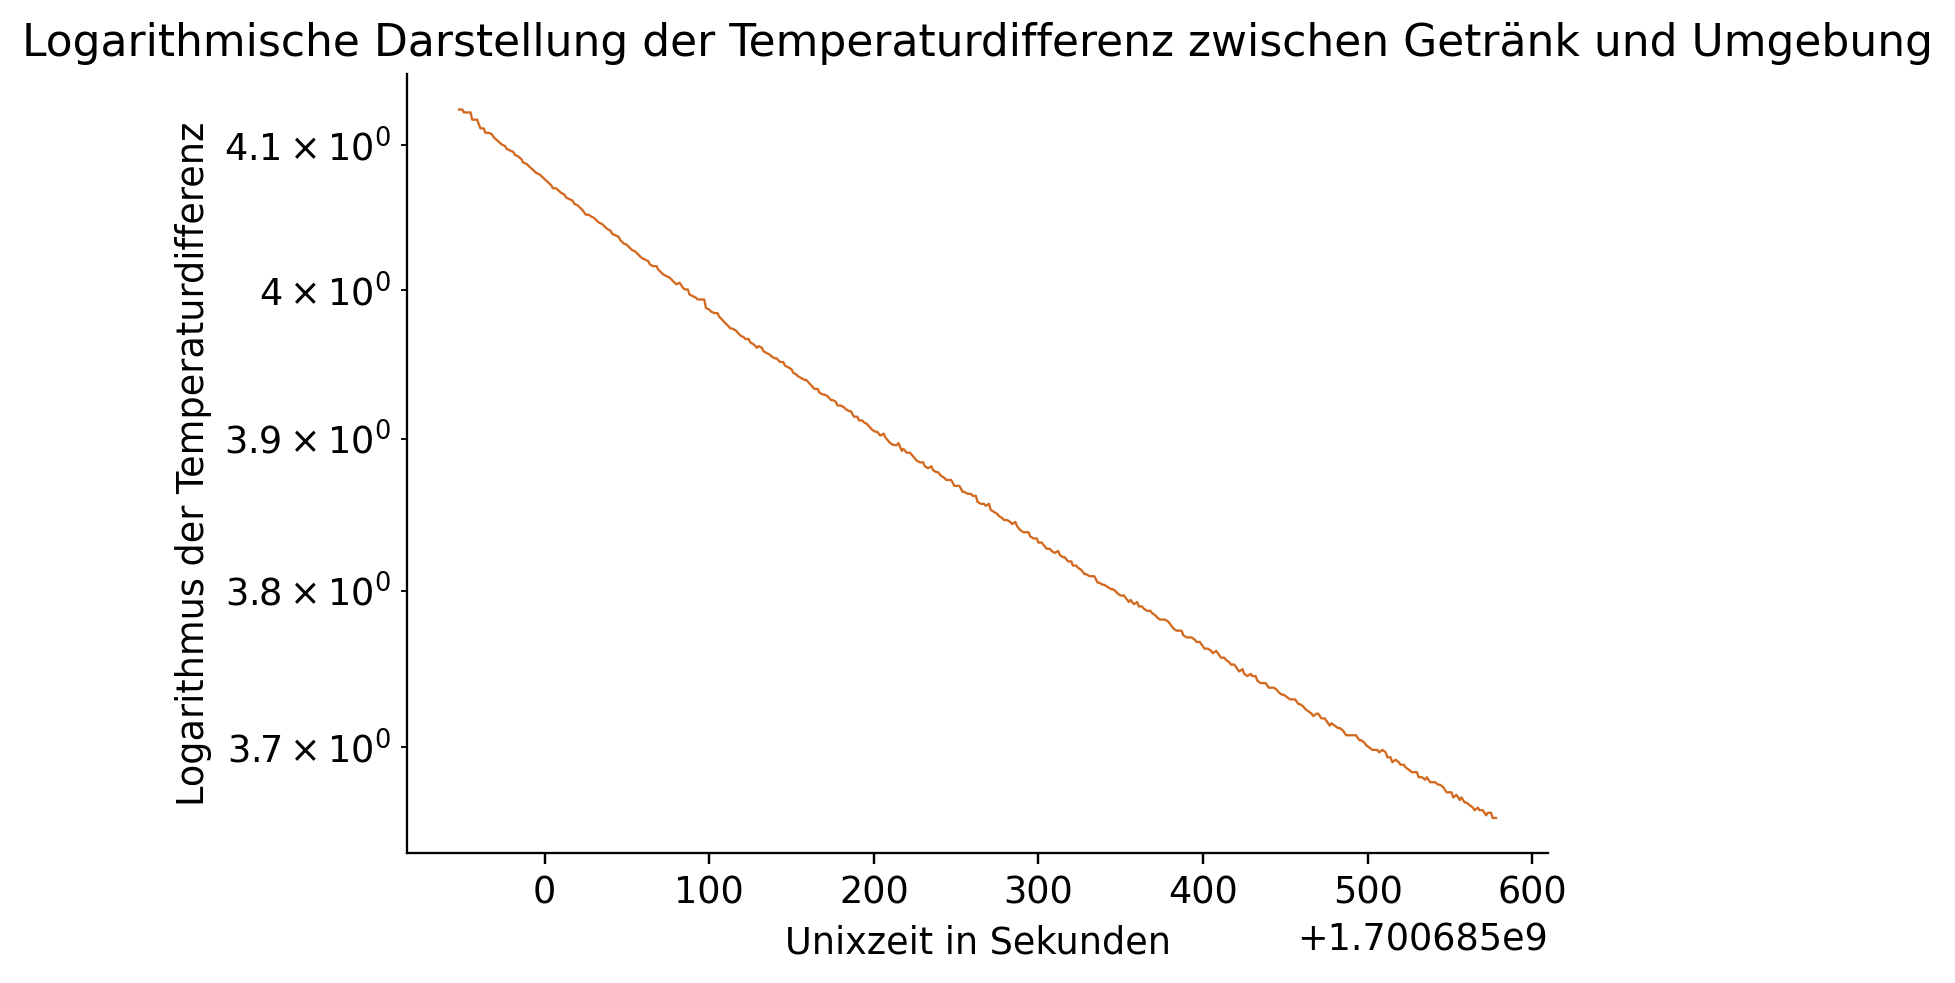

In [3]:
# Sicherstellen, dass die beiden Temperaturlisten gleich viele Einträge haben, um sie voneinander subtrahieren zu können.
# Falls dieses nicht der Fall ist, wird bei der ersten Liste der letzte Eintrag gelöscht.
# Bei der Zeit wird im Folgenden nur die der zweiten Messung verwendet, welche gleich viele Einträge enthält wie nun beide Temperaturlisten.
if len(temp_sensor_1) > len(temp_sensor_2):
    temp_sensor_1 = temp_sensor_1[:-1]
    # TODO: Use the temperature and time data for plotting
temp_diff = [x - y for x, y in zip(temp_sensor_1, temp_sensor_2)]
plt.plot(time_sensor_2, np.log(temp_diff), color="chocolate")
# Plotbeschriftung und -design
plt.yscale("log")
plt.title("Logarithmische Darstellung der Temperaturdifferenz zwischen Getränk und Umgebung")
plt.xlabel("Unixzeit in Sekunden")
plt.ylabel("Logarithmus der Temperaturdifferenz")
# Abspeichern des Plots als separate Datei im svg-Format
plt.savefig("plot_newton.svg",format = 'svg')
# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [4]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
T_1 = temp_sensor_1[0]
T_2 = temp_sensor_1[-1]
y_0 = [x - T_2 for x in temp_sensor_1]
y = [x / (T_1 - T_2) for x in y_0]
coefficient = np.polyfit(time_sensor_2, y, 1)
# DONE #

#### (iV) Ergebnis

In [5]:
# TODO: Print result
print(f'Der Transportkoeffizient ist K = {coefficient[0]} 1/s')
# Die Polyfit-Funktion gibt eine Liste mit zwei Ergebnissen aus.
# Der coefficient[1]-Wert kann verworfen werden, weil er im Zusammenhang mit dem Versuch nicht relevant ist.
# DONE #

Der Transportkoeffizient ist K = -0.0015506484478575923 1/s


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Am geraden Verlauf des Graphen bei einer logarithmisch skalierten y-Achse lässt sich feststellen, dass die Temperatur des Getränks logarithmisch abnimmt. Der Transportkoeffizient für den Vorgang wurde berechnet zu K = -0,00155 1/s. Die Polyfit-Funktion gibt auch einen zweiten Wert aus, welcher allerdings im Bezug auf das Experiment verworfen werden kann, da es ein großer positiver Wert ist, welcher nicht zur negativen Steigung des Versuchsgraphen passt.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Grundsätzlich schöner Versuch. Leider beschäftigt man sich mit diesem konkret höchstens 1/100 der Zeit. Immenser Aufwand steht in keinem Verhältnis zu den billigen 2 CP. Besonders die Kapriolen des Jupyter Hubs und des Raspberry Pis, plötzlich einzufrieren oder Bluetooth-Verbindungen nicht mehr zuzulassen, sind frustrierend. Außerdem kam es während der Messungen wiederholt zu Kontaktabbrüchen zu den Sensoren, obwohl alle Kabel gewissenhaft verbunden wurden. Dadurch konnte die erste vollständige Messung bei diesem relativ lange dauernden Versuch erst nach über zehn Anläufen und stundenlangem Probieren erfolgreich durchgeführt werden!!! Alleine die Bearbeitungszeit dieser Abgabe war länger als die der unnötigen emb-Woche. Darunter leiden besonders andere Projekte, wie das PDP. Für die weiteren Fächer in diesem Semester bleibt so gut wie gar keine Zeit. Daher mein persönliches Fazit: In Anbetracht der Tatsache, dass noch weitere Versuche folgen, fühlt man sich wie der letzte Knecht.